# Use hh2 dataset to train a maching learning model

In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

Import Dataset and remove variables where outcome is a nonstarter

In [2]:
hh = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Data_Wrangling/hh3.csv")

In [3]:
hh.shape

(70203, 19)

In [4]:
hh = hh[hh.unbanked >= 0]

In [5]:
hh = hh.dropna()

In [6]:
hh.shape

(32261, 19)

Split the data by X and Y and prepare training sample

In [7]:
y = hh["unbanked"]
X = hh[["ST_bnk_density","ST_UR_19","income","age","education","poverty","under_25","unemployed","citizen","native_born","White_or_AAPI","inc_vol","internet","children","single_mother"]]

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.1,random_state=1999)

In [9]:
# Let's 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [10]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,ST_bnk_density,ST_UR_19,income,age,education,poverty,under_25,unemployed,citizen,native_born,White_or_AAPI,inc_vol,internet,children,single_mother
0,0.028454,0.03125,0.75,0.785714,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.071433,0.68750,0.50,0.228571,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.104333,0.37500,1.00,0.342857,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.145946,0.34375,1.00,0.600000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.137676,0.12500,1.00,0.442857,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29029,1.000000,0.46875,0.00,0.885714,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
29030,0.244008,0.53125,1.00,0.700000,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
29031,0.113335,0.84375,0.50,0.842857,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
29032,0.244008,0.53125,1.00,0.400000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [11]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ["ST_bnk_density","ST_UR_19","income","age","education","poverty","under_25","unemployed","citizen","native_born","White_or_AAPI","inc_vol","internet","children","single_mother"])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['ST_bnk_density',
                                                                          'ST_UR_19',
                                                                          'income',
                                                                          'age',
                                                                          'education',
                                                                          'poverty',
                                                                          'under_25',
                                                                          'unemployed',
                    

In [13]:
search.best_score_

-0.037410867844292456

In [14]:
search.best_params_

{'model': DecisionTreeRegressor(max_depth=5), 'model__max_depth': 5}

In [15]:
pred_y = search.predict(test_X)

In [16]:
#the best model is a random forest so we need to establish it as a variable
dtree = search.best_estimator_

In [17]:
m.mean_squared_error(test_y,pred_y)

0.04363561101703493

In [18]:
m.r2_score(test_y,pred_y)

0.06290198687855986

In [22]:
m.accuracy_score(train_y,dtree.predict(train_X))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [19]:
#m.accuracy_score(test_y,pred_y)

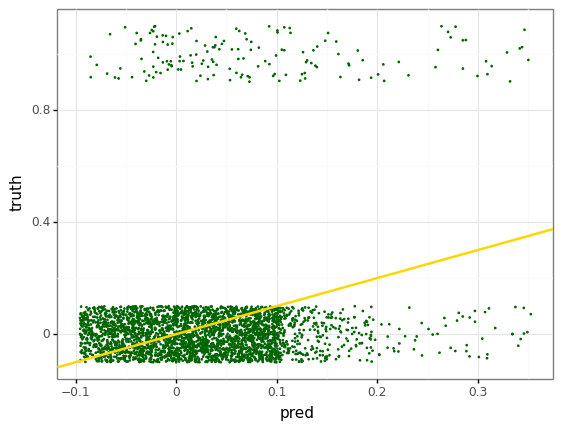

<ggplot: (8777168619123)>

In [24]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_jitter(color="darkgreen", size=.1, width = 0.1, height = 0.1) +
    geom_abline(color="gold",size=1) +
    theme_bw() 
)

In [26]:
#permute features to determine importances
vi = permutation_importance(dtree,train_X,train_y,n_repeats=25)

In [27]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,internet,0.094843,0.004181,0.086481,0.103206
1,poverty,0.084575,0.003551,0.077473,0.091678
2,age,0.074950,0.003862,0.067227,0.082673
3,White_or_AAPI,0.052945,0.002788,0.047368,0.058522
4,income,0.032575,0.002215,0.028145,0.037004
5,education,0.026422,0.001864,0.022694,0.030150
6,ST_bnk_density,0.011810,0.002478,0.006855,0.016765
7,citizen,0.006379,0.000764,0.004851,0.007907
8,children,0.005647,0.000736,0.004175,0.007119
9,native_born,0.001030,0.000197,0.000637,0.001424


In [28]:
vi_dat.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Submission_Content/Fig_Data/Sel_Var_Reliance.csv")

Run Decision Tree Seperately since it's the best model